In [1]:
#importing libraries
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("ToyotaCorolla.csv")

In [4]:
df1=df

In [5]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [7]:
df['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [8]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


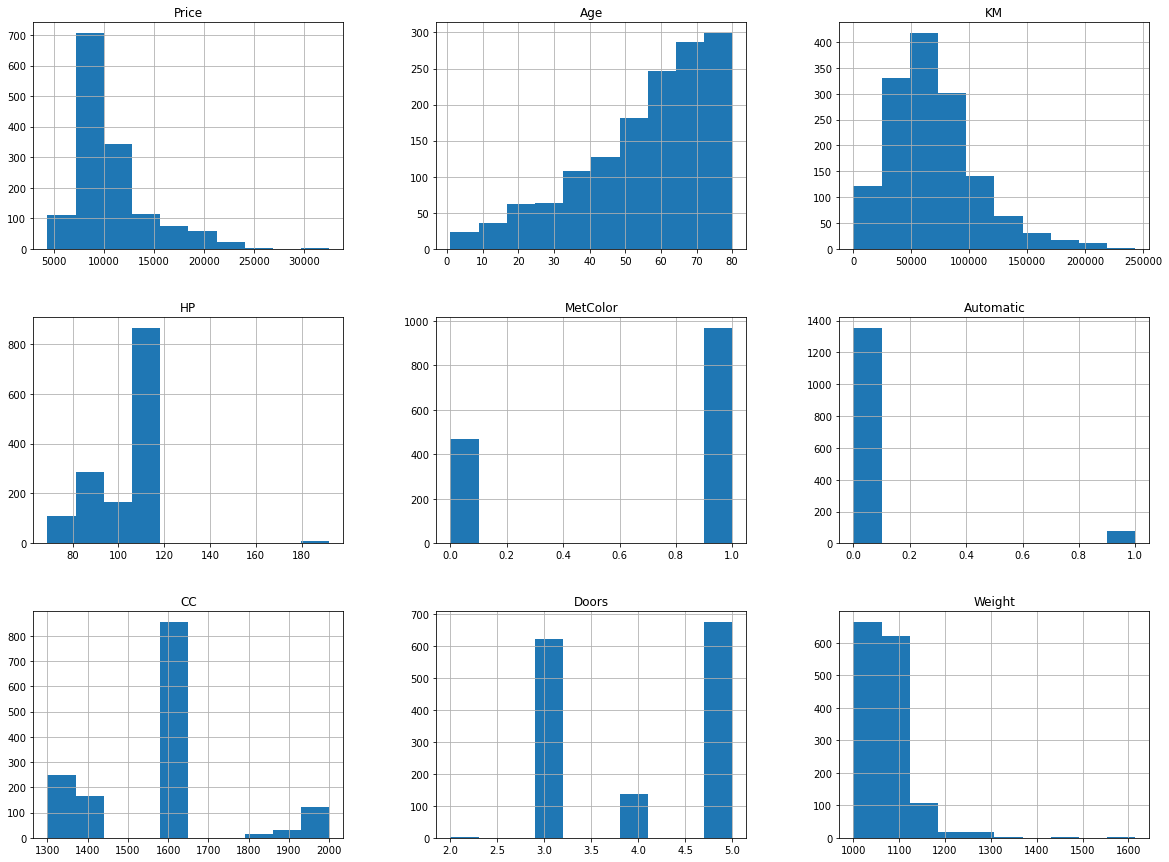

In [9]:
df.hist(figsize=(20,15))
plt.show()

#### Method-1: Splitting dataset into training and test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=5)

In [12]:
len(train_set)

1005

In [13]:
len(test_set)

431

In [14]:
test_set.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
655,8250,59,113700,Petrol,110,1,0,1600,5,1065
786,9950,67,75429,Petrol,110,1,0,1600,3,1065
34,15500,22,41000,Petrol,97,1,0,1400,3,1100
1396,9800,77,48838,Petrol,110,0,0,1600,3,1055
517,10000,56,52000,Petrol,97,0,0,1400,3,1025


#### Method-2: Splitting dataset into training and test data

In [15]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(df, 0.3)

In [17]:
print(len(train_set))
print(len(test_set))

1006
430


#### Categorizing Price using cut function on dataframe

In [18]:
df["Price_cat"] = pd.cut(df["Price"], bins=[0, 4000, 8000, 12000, 16000, np.inf],
                               labels=['0-4k', '4-8k', '8-12k', '12-16k', '16k+'])
df["Price_cat"].value_counts()

8-12k     820
4-8k      304
12-16k    172
16k+      140
0-4k        0
Name: Price_cat, dtype: int64

<AxesSubplot:>

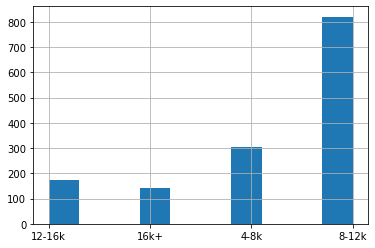

In [19]:
df["Price_cat"].hist()

#### Stratified

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in split.split(df, df["Price_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [21]:
strat_test_set["Price_cat"].value_counts() / len(strat_test_set)

8-12k     0.569444
4-8k      0.211806
12-16k    0.121528
16k+      0.097222
0-4k      0.000000
Name: Price_cat, dtype: float64

In [22]:
df["Price_cat"].value_counts() / len(df)

8-12k     0.571031
4-8k      0.211699
12-16k    0.119777
16k+      0.097493
0-4k      0.000000
Name: Price_cat, dtype: float64

In [23]:
def income_cat_proportions(data):
    return data["Price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [24]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0-4k,0.000000,0.000000,0.000000,NaN,NaN
4-8k,0.211699,0.211806,0.232639,9.891265,0.050256
8-12k,0.571031,0.569444,0.552083,-3.318089,-0.277778
12-16k,0.119777,0.121528,0.125000,4.360465,1.461563
16k+,0.097493,0.097222,0.090278,-7.400794,-0.277778


#### Visualization

<AxesSubplot:xlabel='KM', ylabel='Price'>

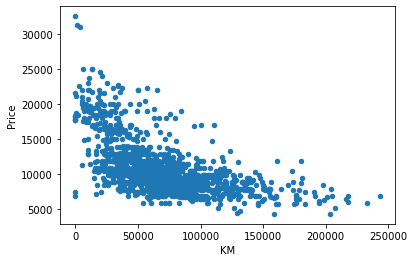

In [25]:
df.plot(kind="scatter", x="KM", y="Price")

<AxesSubplot:xlabel='Age', ylabel='Price'>

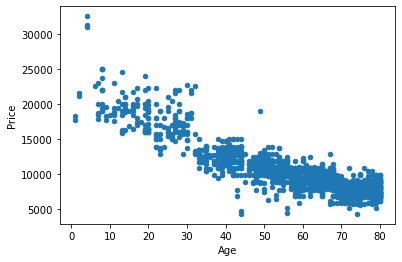

In [26]:
df.plot(kind="scatter", x="Age", y="Price")

<AxesSubplot:xlabel='HP', ylabel='Price'>

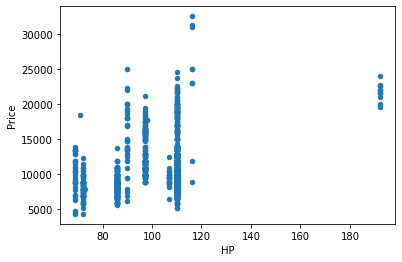

In [27]:
df.plot(kind="scatter", x="HP", y="Price")

<AxesSubplot:xlabel='CC', ylabel='Price'>

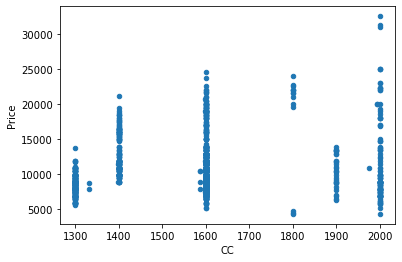

In [28]:
df.plot(kind="scatter", x="CC", y="Price")

#### Correlations

In [29]:
corr_matrix = df.corr()

In [30]:
corr_matrix["Price"].sort_values(ascending=False)

Price        1.000000
Weight       0.581198
HP           0.314990
Doors        0.185326
CC           0.165067
MetColor     0.108905
Automatic    0.033081
KM          -0.569960
Age         -0.876590
Name: Price, dtype: float64

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Weight', ylabel='Price'>,
        <AxesSubplot:xlabel='HP', ylabel='Price'>,
        <AxesSubplot:xlabel='Doors', ylabel='Price'>,
        <AxesSubplot:xlabel='CC', ylabel='Price'>,
        <AxesSubplot:xlabel='MetColor', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='HP', ylabel='Weight'>,
        <AxesSubplot:xlabel='Doors', ylabel='Weight'>,
        <AxesSubplot:xlabel='CC', ylabel='Weight'>,
        <AxesSubplot:xlabel='MetColor', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Price', ylabel='HP'>,
        <AxesSubplot:xlabel='Weight', ylabel='HP'>,
        <AxesSubplot:xlabel='HP', ylabel='HP'>,
        <AxesSubplot:xlabel='Doors', ylabel='HP'>,
        <AxesSubplot:xlabel='CC', ylabel='HP'>,
        <AxesSubplot:xlabel='MetColor', ylabel='HP'>],
       [<AxesSubplot:xlabel='Price', ylabel

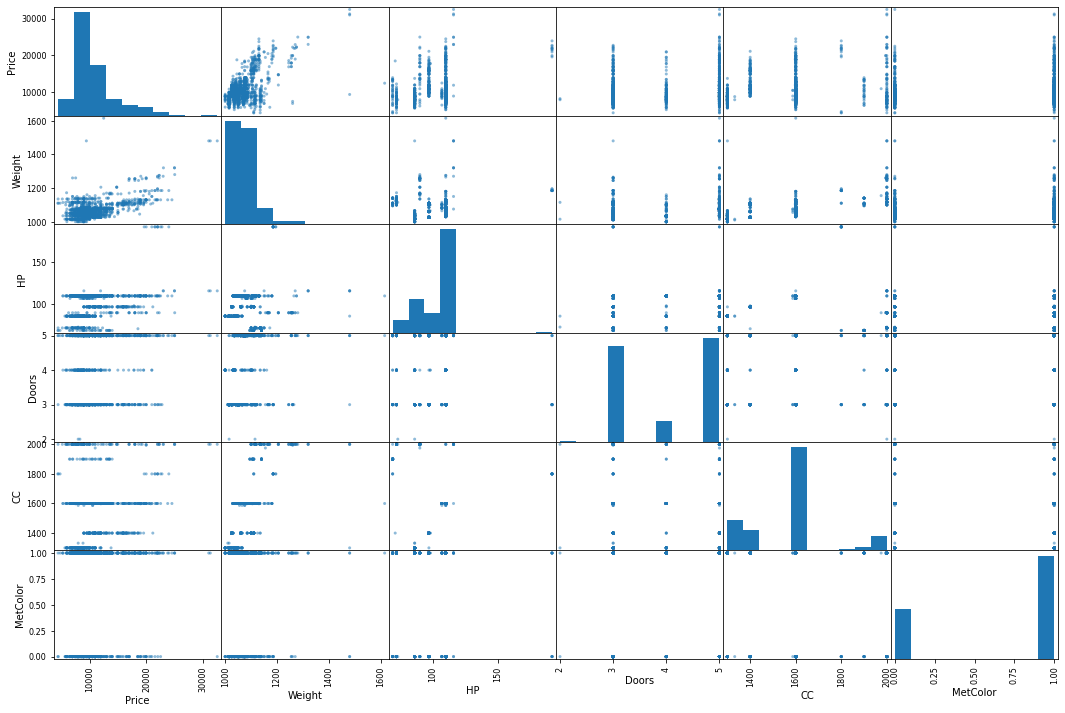

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Weight", "HP", "Doors", "CC", "MetColor"]
scatter_matrix(df[attributes], figsize=(18, 12))

In [32]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Price_cat'],
      dtype='object')

#### Data Cleaning

In [33]:
df.dropna()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_cat
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,12-16k
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,12-16k
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,12-16k
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,12-16k
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,12-16k
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025,4-8k
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015,8-12k
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015,8-12k
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015,4-8k


In [34]:
#Dropping additionally added columns
df.drop(axis=1, columns=['Price_cat'])

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [35]:
df.count()

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
Price_cat    1436
dtype: int64

As the count is same for all the columns in dataframe, we can assume that there are no more null values.

#### Dummyfying categorical variables

Dummyfying here with get_dummies and later with one hot encoder

In [36]:
# Dummifying predictors
df = pd.get_dummies(df, columns = ['FuelType'])

In [37]:
df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price_cat,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,12-16k,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,12-16k,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,12-16k,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,12-16k,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,12-16k,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,1025,4-8k,0,0,1
1432,10845,72,19000,86,0,0,1300,3,1015,8-12k,0,0,1
1433,8500,71,17016,86,0,0,1300,3,1015,8-12k,0,0,1
1434,7250,70,16916,86,1,0,1300,3,1015,4-8k,0,0,1


#### Dropping previously added Price category

In [38]:
df1 = df1.drop(axis=1, columns=['Price_cat'])

In [39]:
df1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


### Transformation pipelines

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(df1.drop(axis=1, columns=['Price','FuelType']))
cat_attribs = ["FuelType"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [42]:
training_data = full_pipeline.fit_transform(df1)

In [43]:
training_labels = df1['Price']

In [44]:
#test_data
some_data = df1.iloc[:10]
some_labels = training_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)

In [45]:
some_data_prepared

array([[-1.77196633, -0.57469494, -0.76804185,  0.69421909, -0.24289308,
         2.31497633, -1.08513865,  1.75856113,  0.        ,  1.        ,
         0.        ],
       [-1.77196633,  0.11745379, -0.76804185,  0.69421909, -0.24289308,
         2.31497633, -1.08513865,  1.75856113,  0.        ,  1.        ,
         0.        ],
       [-1.71818412, -0.71538641, -0.76804185,  0.69421909, -0.24289308,
         2.31497633, -1.08513865,  1.75856113,  0.        ,  1.        ,
         0.        ],
       [-1.61061971, -0.54765017, -0.76804185, -1.44046745, -0.24289308,
         2.31497633, -1.08513865,  1.75856113,  0.        ,  1.        ,
         0.        ],
       [-1.3954909 , -0.80102818, -0.76804185, -1.44046745, -0.24289308,
         2.31497633, -1.08513865,  1.853577  ,  0.        ,  1.        ,
         0.        ],
       [-1.28792649, -0.20092236, -0.76804185, -1.44046745, -0.24289308,
         2.31497633, -1.08513865,  1.853577  ,  0.        ,  1.        ,
         0.   

### Model Training

#### 1. Linear Model

In [46]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(training_data, training_labels)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error

test_predictions = linear.predict(some_data_prepared)

In [48]:
lin_mse = mean_squared_error(some_labels, test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1886.56224170052

In [49]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(some_labels, test_predictions)
lin_mae

1622.506970810294

### 2. Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=5)
tree.fit(training_data, training_labels)

DecisionTreeRegressor(random_state=5)

In [51]:
tree_predictions = tree.predict(some_data_prepared)
tree_mse = mean_squared_error(some_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 3. Decision Tree

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=5)
forest.fit(training_data, training_labels)

RandomForestRegressor(random_state=5)

In [53]:
forest_predictions = forest.predict(some_data_prepared)
forest_mse = mean_squared_error(some_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

376.98770543613216

### 4. SVM

In [54]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(training_data, training_labels)
svm_predictions = svm_reg.predict(some_data_prepared)
svm_mse = mean_squared_error(some_labels, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

3787.4860126563676

### Cross Validations

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [57]:
#Preparing data for cross validations
X_cv = full_pipeline.fit_transform(df1)
y_cv = df['Price']

### 1. Linear

In [58]:
linear_scores = cross_val_score(linear, X_cv, y_cv,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-linear_scores)
display_scores(lin_rmse_scores)

Scores: [4083.7321339  2090.24619027 1517.45587794 1203.38368795 1390.93153147
  937.04944358 1294.48902411 1253.22438271  954.39823831 1169.72416324]
Mean: 1589.463467347608
Standard deviation: 887.1875092794767


### 2. Decision Trees

In [59]:
scores = cross_val_score(tree, X_cv, y_cv, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [3458.0501119  1919.59233049 2101.28300754 1560.1528838  1776.83493184
 1154.08220208 1471.7905108  1812.36935869 1178.31529018 1433.11516283]
Mean: 1786.5585790152552
Standard deviation: 629.0183721419706


### 3. Random Forest

In [60]:
forest_scores = cross_val_score(forest, X_cv, y_cv, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3503.62797538 1529.71651744 1400.51630834 1320.65313177 1112.12894113
  881.42745605  836.82441915 1319.96474293  894.59561152 1036.09341499]
Mean: 1383.55485186969
Standard deviation: 742.2189705500522


## Fine Tuning Model

### Grid Search

As RandomForest has lowest mean error as per our cross validations, we are further using grid search to get the best estimators for random forest.

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 50, 80], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_grid = RandomForestRegressor(random_state=5)
grid_search = GridSearchCV(forest_grid, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_cv, y_cv)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [30, 50, 80]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=30, random_state=5)

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2780.3100812351545 {'max_features': 2, 'n_estimators': 30}
2760.077346637232 {'max_features': 2, 'n_estimators': 50}
2772.7640657826446 {'max_features': 2, 'n_estimators': 80}
2630.817372610161 {'max_features': 4, 'n_estimators': 30}
2602.165172291475 {'max_features': 4, 'n_estimators': 50}
2615.7801323832 {'max_features': 4, 'n_estimators': 80}
2585.586879853795 {'max_features': 6, 'n_estimators': 30}
2564.4477948921394 {'max_features': 6, 'n_estimators': 50}
2568.1538072966264 {'max_features': 6, 'n_estimators': 80}
2429.0391019592826 {'max_features': 8, 'n_estimators': 30}
2412.5258199642417 {'max_features': 8, 'n_estimators': 50}
2464.2542373993033 {'max_features': 8, 'n_estimators': 80}
2405.4986225731527 {'max_features': 10, 'n_estimators': 30}
2409.7273468827866 {'max_features': 10, 'n_estimators': 50}
2451.0811252314047 {'max_features': 10, 'n_estimators': 80}
3051.4724231896253 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2899.0332478227892 {'bootstrap': False, '

In [65]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045686,0.001172,0.002801,0.000405,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.265040e+07,-1.678748e+06,...,-7.730124e+06,1.246112e+07,17,-165021.648229,-194721.738053,-212824.127276,-216257.093828,-223739.985391,-202512.918556,21033.827944
1,0.072407,0.000488,0.004386,0.000488,2,50,NaN,"{'max_features': 2, 'n_estimators': 50}",-3.215355e+07,-1.721849e+06,...,-7.618027e+06,1.226916e+07,15,-158721.952566,-187006.857782,-203723.445478,-201938.722203,-206018.211162,-191481.837838,17684.711291
2,0.120467,0.002026,0.007298,0.000429,2,80,NaN,"{'max_features': 2, 'n_estimators': 80}",-3.273737e+07,-1.645456e+06,...,-7.688221e+06,1.252576e+07,16,-154733.578717,-185307.213271,-192021.421459,-201422.558343,-199713.769116,-186639.708181,16959.971734
3,0.052065,0.001713,0.002582,0.000479,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.951662e+07,-1.588185e+06,...,-6.921200e+06,1.129900e+07,14,-159199.899887,-171269.158841,-194762.725856,-209158.227530,-201210.736777,-187120.149778,18833.081266
4,0.088694,0.001894,0.004198,0.000394,4,50,NaN,"{'max_features': 4, 'n_estimators': 50}",-2.880970e+07,-1.573801e+06,...,-6.771264e+06,1.102057e+07,11,-153820.300601,-166796.437845,-183773.185203,-191758.803080,-184691.646277,-176168.074601,13862.253598
5,0.170607,0.057186,0.008180,0.002118,4,80,NaN,"{'max_features': 4, 'n_estimators': 80}",-2.928273e+07,-1.521527e+06,...,-6.842306e+06,1.122132e+07,12,-149699.657423,-164098.908003,-175991.772606,-185373.733123,-176393.240903,-170311.462412,12325.325875
6,0.060066,0.000928,0.002994,0.000003,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.842503e+07,-1.589383e+06,...,-6.685260e+06,1.087143e+07,10,-158956.627667,-166060.192042,-189426.816549,-187592.700189,-187377.643699,-177882.796029,12772.412417
7,0.103947,0.002318,0.004182,0.000385,6,50,NaN,"{'max_features': 6, 'n_estimators': 50}",-2.798843e+07,-1.547539e+06,...,-6.576392e+06,1.070744e+07,8,-153755.857015,-163372.107738,-180720.585517,-177109.275060,-177015.453389,-170394.655744,10214.809869
8,0.162565,0.002003,0.006383,0.000488,6,80,NaN,"{'max_features': 6, 'n_estimators': 80}",-2.816730e+07,-1.568534e+06,...,-6.595414e+06,1.078766e+07,9,-149388.233864,-160345.555627,-176076.352238,-174490.141125,-173327.443489,-166725.545269,10320.835572
9,0.069433,0.001402,0.002416,0.000471,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.446341e+07,-1.758978e+06,...,-5.900231e+06,9.285379e+06,4,-156613.494216,-166545.753976,-188620.346524,-187672.063560,-188382.533559,-177566.838367,13429.682152


### Randomized Search

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_features': randint(low=1, high=10),
    }

forest = RandomForestRegressor(random_state=5)
random_search = RandomizedSearchCV(forest, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=5)
random_search.fit(X_cv, y_cv)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C64709AF10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C6470B1670>},
                   random_state=5, scoring='neg_mean_squared_error')

In [67]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2591.5671528629714 {'max_features': 4, 'n_estimators': 207}
2513.1102360722452 {'max_features': 7, 'n_estimators': 119}
2868.9700455219645 {'max_features': 1, 'n_estimators': 74}
2452.327534039655 {'max_features': 9, 'n_estimators': 229}
2481.6699896601826 {'max_features': 8, 'n_estimators': 447}
2853.569785048256 {'max_features': 1, 'n_estimators': 159}
2936.6193436027415 {'max_features': 1, 'n_estimators': 8}
2758.6139813674185 {'max_features': 2, 'n_estimators': 438}
2467.223529917789 {'max_features': 8, 'n_estimators': 81}
2756.0754080448323 {'max_features': 2, 'n_estimators': 432}


In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.97059726e-01, 9.73295373e-02, 1.74907996e-02, 4.53614968e-03,
       8.70155935e-04, 4.94653336e-03, 4.15630884e-03, 7.05743578e-02,
       4.44733117e-04, 1.72744723e-03, 8.64250966e-04])

#### Evaluating on test model

In [69]:
final_model = grid_search.best_estimator_

final_model

RandomForestRegressor(max_features=10, n_estimators=30, random_state=5)

In [70]:
final_predictions = final_model.predict(some_data_prepared)

final_mse = mean_squared_error(some_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [71]:
final_rmse

527.3320797498794

#### T:Score: Calculating confidence interval for rmse at 95% confidence interval (library based)

In [72]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - some_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([278.54299002, 691.78901941])

#### T-Score: Calculating confidence interval for rmse at 95% confidence interval (calculation based)

In [73]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(278.5429900242098, 691.7890194091256)

#### Z-scores: Calculating confidence interval for rmse at 95% confidence interval

In [74]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(323.062382388397, 672.1524691260158)

### Extra

In [75]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

In [76]:
full_pipeline_with_predictor.fit(df1.drop(axis=1, columns=['Price']), df1['Price'])

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'KM', 'HP',
                                                   'MetColor', 'Automatic',
                                                   'CC', 'Doors', 'Weight']),
                                                 ('cat', OneHotEncoder(),
                                                  ['FuelType'])])),
                ('linear', LinearRegression())])

In [77]:
full_pipeline_with_predictor.predict(some_data.drop(axis=1, columns=['Price']))

array([16490.00034792, 16069.37824857, 16453.48474713, 16050.36188128,
       15816.3297551 , 15207.61359404, 16830.75350947, 16768.17841702,
       21555.65890973, 13981.17415081])

#### RandomizedSearchCV visualization

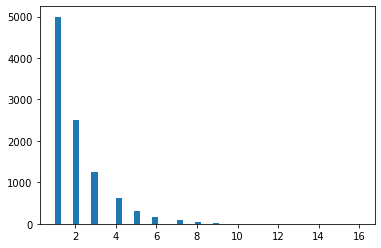

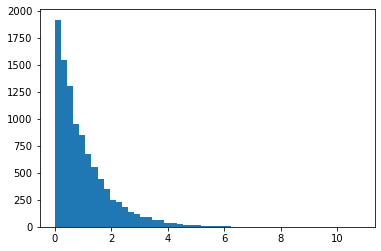

In [78]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=5)
expon_distrib=expon(scale=1).rvs(10000, random_state=5)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()